# Philippine Real Estate Background and Overview

## Short Overview of the Data Analysis
The goal of this notebook is to use regression analysis to show what features are the most prevailant that are the main deciding factors of customers/consumers in buying real estate while also showing possible prices given the significant features that dictate the price of real estate.

The data analysis will be comprised of the following:

1. Data Preparation (Obtaining the dataset)
2. Data Cleaning (Removing null values/imputing missing data values)
3. EDA (Use of histograms/Heatmaps)
4. Data Analysis and Modeling (Linear Regression)
5. Prediction of the prices of the given real estate

## Imported packages

In [4]:
import pandas as pd #data analysis and manipulation tool
import numpy as np #collection of mathematical functions
import matplotlib.pyplot as plt #graphs and plots and visualizations
import seaborn as sns #similar to matplotlib (data visualizations)
import sklearn as skl #classification and regression tools
import os #For the operating system of the chosen machine (Mac OS, Windows, Linux)
from scipy.stats import iqr
import scipy.stats 


# Data Preparation

In [5]:
#Setting the directory
os.chdir('/Users/raph/Downloads/')

In [6]:
#Importing the dataset
real_estate = pd.read_csv('./PH_houses_v2.csv')
real_estate.head()

,Description,Location,Price (PHP),Bedrooms,Bath,Floor_area (sqm),Land_area (sqm),Latitude,Longitude,Link
0,2-Bedroom Unit for Sale in Amisa Private Resid...,"Mactan, Lapu-Lapu","15,916,180",2,2,74,na,10.3051555,124.011241,https://www.lamudi.com.ph/2-bedroom-unit-for-s...
1,1-Bedroom Unit for Sale in Amisa Private Resid...,"Mactan, Lapu-Lapu","8,730,355",1,1,41,na,10.3051555,124.011241,https://www.lamudi.com.ph/1-bedroom-unit-for-s...
2,Offices at The Galleon - Prime Unit (11G) for ...,"San Antonio, Pasig","27,448,000",na,na,82,na,14.588716,121.060009,https://www.lamudi.com.ph/offices-at-the-galle...
3,1-Bedroom Unit (821) for Sale in Maple at Verd...,"Ugong, Pasig","16,011,000",1,na,58,na,14.588882,121.079016,https://www.lamudi.com.ph/1-bedroom-unit-821-f...
4,Alice 2 Storey Townhouse For Sale in Lancaster...,"Tapia, General Trias","1,935,600",3,na,40,40,14.35507,120.876425,https://www.lamudi.com.ph/alice-2-storey-townh...


Upon first glance of the first 5 entries of the dataset, we will place less focus on the columns: description, and link. It follows that longittude and latitude are important factors however, for this case, we choose to not factor them in as well rather we will use the general area which is found in the location. We will also focus on the bedrooms, bathrooms, floor_area, and the land_area.

# Data Cleaning

In [7]:
#Separating municipality and the city
real_estate[['municipality', 'city']] = real_estate.Location.str.split(', ', expand=True)

#Removing unwanted columns
real_estate.drop(['Description', 'Location', 'Longitude', 'Latitude', 'Link'], axis = 1, inplace=True)
real_estate.dtypes


Price (PHP)         object
Bedrooms            object
Bath                object
Floor_area (sqm)    object
Land_area (sqm)     object
municipality        object
city                object
dtype: object

In [8]:
#Removing rows that do not have prices (This may be used as a testing index)
mod_real_estate = real_estate.drop(labels =real_estate[real_estate['Price (PHP)'] == 'na'].index, axis = 0)
mod_real_estate['Price (PHP)'] = mod_real_estate['Price (PHP)'].str.replace(',','').astype(float)

for i in range(4):
    mod_real_estate.iloc[:,i+1] = pd.to_numeric(mod_real_estate.iloc[:,i+1], errors='coerce')

In [9]:
#Checking for NaN values under all the columns
print('Before imputing the data', '\n')
for i in range(len(mod_real_estate.columns)):
    print('NaN Values for {}: {}'.format(mod_real_estate.columns[i],mod_real_estate[mod_real_estate.columns[i]].isna().sum()))

print('=======================')
print('After imputing the data','\n')
#Removing NaN in the Bedrooms, Bath, Floor_area(sqm), and the Land_area(sqm)
mod_real_estate.iloc[:,0:5]=mod_real_estate.iloc[:,0:5].replace(np.nan, 0)
for i in range(len(mod_real_estate.columns)):
    print('NaN Values for {}: {}'.format(mod_real_estate.columns[i],mod_real_estate[mod_real_estate.columns[i]].isna().sum()))

Before imputing the data 

NaN Values for Price (PHP): 0
NaN Values for Bedrooms: 110
NaN Values for Bath: 621
NaN Values for Floor_area (sqm): 52
NaN Values for Land_area (sqm): 1139
NaN Values for municipality: 0
NaN Values for city: 1
After imputing the data 

NaN Values for Price (PHP): 0
NaN Values for Bedrooms: 0
NaN Values for Bath: 0
NaN Values for Floor_area (sqm): 0
NaN Values for Land_area (sqm): 0
NaN Values for municipality: 0
NaN Values for city: 1


In [10]:
# #Removing the row entry where the city is not available
# mod_real_estate = mod_real_estate.drop(labels =mod_real_estate.city.isna().index,axis = 0)
# for i in range(len(mod_real_estate.columns)):
#     print('NaN Values for {}: {}'.format(mod_real_estate.columns[i],mod_real_estate[mod_real_estate.columns[i]].isna().sum()))

# Exploratory Data Analysis

## Histograms

Top 3 city with the most real estate offers
Pasig          697
Mandaluyong     96
Quezon City     94
Name: city, dtype: int64


/var/folders/qg/90z639dn6ws7fn4d4_jsyky40000gn/T/ipykernel_2818/2814995736.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


<function matplotlib.pyplot.show(close=None, block=None)>

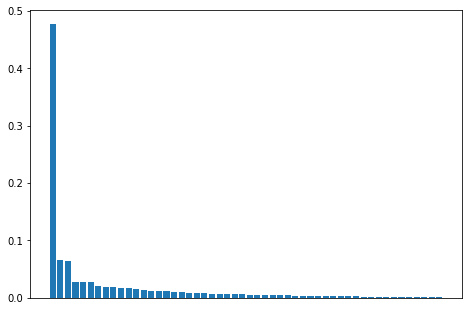

In [11]:
#Obtaining the number of real estate per city
print('Top 3 city with the most real estate offers')
print(mod_real_estate.city.value_counts().nlargest(3))
print('=============================')

index_city = list(map(str,np.array(mod_real_estate.city.value_counts().reset_index()).T[0]))
count_city =np.array(mod_real_estate.city.value_counts().reset_index()).T[1]
norm_city = count_city/count_city.sum()
# Histogram of the PClasses
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index_city, norm_city)
ax.set_xticks([])
plt.show

From this, a focus will be done on the Pasig city, Quezon City, and Mandaluyong Area. Simialrly we check the municipality of these three cities as they have the most instances compared to the rest.

Top 3 municipalities with the most real estate offers
Ugong            262
Ortigas CBD      151
Oranbo           141
San Antonio      139
Highway Hills     73
Name: municipality, dtype: int64


/var/folders/qg/90z639dn6ws7fn4d4_jsyky40000gn/T/ipykernel_2818/601885069.py:13: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.set_xticks([])


<function matplotlib.pyplot.show(close=None, block=None)>

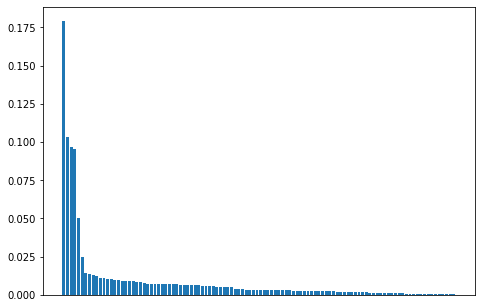

In [12]:
#Obtaining the number of real estates per municipalities 
print('Top 3 municipalities with the most real estate offers')
print(mod_real_estate.municipality.value_counts().nlargest(5))
print('=============================')

index_municipality = list(map(str,np.array(mod_real_estate.municipality.value_counts().reset_index()).T[0]))
count_municipality =np.array(mod_real_estate.municipality.value_counts().reset_index()).T[1]
norm_municipality = count_municipality/count_municipality.sum()
# Histogram of the Municiplaities
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index_municipality, norm_municipality)
ax.set_xticks([])
plt.show

The top 4 municipalities are in the Pasig area while the top 5 highest number of real estate offers is in the Mandaluyong area. 

In [13]:
def bin_range(df):
    vals = df.values
    bin_width = 2 * (iqr(vals) / (len(vals) ** (1./3)))
    num_bins = int((np.amax(vals) + bin_width) / bin_width)
    return bin_width, num_bins 

def histo_viz(df):
    vals = df.values
    bin_width, num_bins = bin_range(df)
    hist = df.hist(bins=num_bins)
    return hist

Bin width: 7.5808
Number of bins: 150


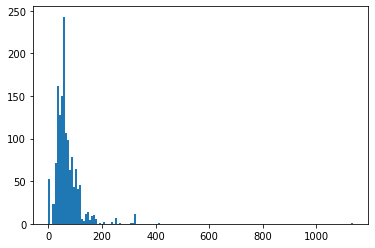

In [14]:
# Data visualizations of the Land Area and the Floor Area

width_fa, numbin_fa = bin_range(mod_real_estate['Floor_area (sqm)'])
print('Bin width: {}'.format(round(width_fa,4)))
print('Number of bins: {}'.format(numbin_fa))
print('====================================')
n_fa, binval_fa, patches_fa = plt.hist(mod_real_estate['Floor_area (sqm)'],bins=numbin_fa)
norm_n_fa = list(map(round, n_fa/n_fa.sum()*100))
# print('Count of each bin: {}'.format(n_fa))
# print('Percentage of each bin: {}'.format(norm_n_fa))
# temp = mod_real_estate['Land_area (sqm)'][mod_real_estate['Land_area (sqm)'] != 0]
# width_la, numbin_la = bin_range([mod_real_estate['Land_area (sqm)'])
#print('Bin width: {}'.format(round(width_la,4)))


Number of bins: 200


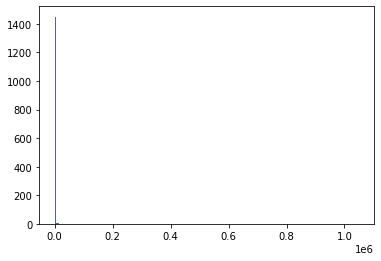

In [15]:
print('Number of bins: {}'.format(200))
print('====================================')
n_la, binval_la, patches_la = plt.hist(mod_real_estate['Land_area (sqm)'],bins=200)

From the first visualization, we can see that most of the floor area fall around the 0 to 200 sqm while the land area must have some extremeties causing almost all the data falling under the 1e6*0 area. 

## Heat Map

In [16]:
mod_real_estate

,Price (PHP),Bedrooms,Bath,Floor_area (sqm),Land_area (sqm),municipality,city
0,15916180.0,2.0,2.0,74.0,0.0,Mactan,Lapu-Lapu
1,8730355.0,1.0,1.0,41.0,0.0,Mactan,Lapu-Lapu
2,27448000.0,0.0,0.0,82.0,0.0,San Antonio,Pasig
3,16011000.0,1.0,0.0,58.0,0.0,Ugong,Pasig
4,1935600.0,3.0,0.0,40.0,40.0,Tapia,General Trias
...,...,...,...,...,...,...,...
1495,11300000.0,1.0,1.0,0.0,0.0,Ortigas CBD,Pasig
1496,41924000.0,2.0,2.0,114.0,0.0,San Antonio,Pasig
1497,14278110.0,2.0,2.0,67.0,0.0,Bagumbayan,Quezon City
1498,7320000.0,1.0,2.0,50.0,0.0,San Antonio,Davao


In [17]:
temp = mod_real_estate.drop(['Price (PHP)'], axis=1)
corr = temp.corr()
print(corr)
temp = corr[((corr > 0.3) & (corr != 1)) | ((corr < -0.3) & (corr != 1))]
print('================================')
print(temp.count())
print('================================')
print('Total number of correlations that fit into the desire correlation conditions: {}'. format(sum(temp.count())))

                  Bedrooms      Bath  Floor_area (sqm)  Land_area (sqm)
Bedrooms          1.000000  0.044027          0.398069        -0.043345
Bath              0.044027  1.000000         -0.004677        -0.029170
Floor_area (sqm)  0.398069 -0.004677          1.000000        -0.036341
Land_area (sqm)  -0.043345 -0.029170         -0.036341         1.000000
Bedrooms            1
Bath                0
Floor_area (sqm)    1
Land_area (sqm)     0
dtype: int64
Total number of correlations that fit into the desire correlation conditions: 2


From this, we can see that the two prominent variable that have a significant correlation between each other is the Bedrooms and the Floor_area (sqm) variables. Now, we move on to model fitting.

# Model Fitting

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats as stats
from statsmodels.stats.anova import anova_lm


In [19]:
#Creating a train and test set
X_train, X_test, y_train, y_test = train_test_split(mod_real_estate.iloc[:,1:5],mod_real_estate.iloc[:,0], test_size = 0.2 )


In [20]:
init_mod = sm.OLS(y_train, X_train).fit()
print(init_mod.summary())

                                 OLS Regression Results                                
Dep. Variable:            Price (PHP)   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.731
Method:                 Least Squares   F-statistic:                              792.6
Date:                Fri, 03 Jun 2022   Prob (F-statistic):                        0.00
Time:                        18:03:52   Log-Likelihood:                         -20511.
No. Observations:                1168   AIC:                                  4.103e+04
Df Residuals:                    1164   BIC:                                  4.105e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Since all variables are significant up to the 0% level of significance, we do not need to adjust the model. Thus, it follows that we apply residual testing.

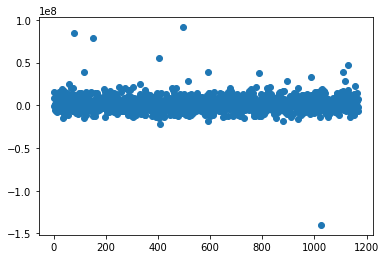

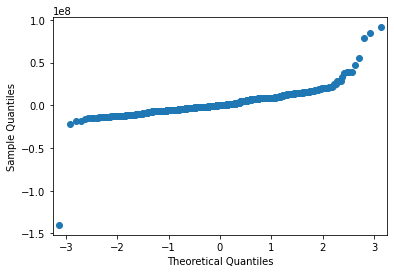

In [21]:
res = init_mod.resid
plt.scatter(list(range(1,len(res)+1)),res)
fig = sm.qqplot(res)
plt.show()

In [22]:
#Jarque-Barque Test
stats.stattools.jarque_bera(res)

(96998.60084814635, 0.0, -0.36646085234771913, 47.638377670012495)

Since the p-value is 0, this impies that the residuals are not normally distirbuted thus, the there is a lack of variables in prediciting house prices. Because of this, further studies would be important such as applying the location. This example will be doen shortly where the dataset will be filtered to only houses in Pasig. This is to use the same city as the basis.However, we check the prediction values of the test data first before proceeding.

## Predictions

In [23]:
y_pred = init_mod.predict(X_test)
print('Variance of the testing data: {}'.format(round(np.var(y_test),4)))
print('Variance of the predicted data: {}'.format(round(np.var(y_pred),4)))
print('=======================================')
F = np.var(y_test)/np.var(y_pred)
df1 = len(y_test) - 1
df2 = len(y_pred) - 1
p_value = scipy.stats.f.cdf(F, df1, df2)
print('F-test\'s p-value: {}'.format(round(p_value,4)))
if p_value < 0.05:
    var = False
else:
    var = True


ts, pval = scipy.stats.ttest_ind(y_pred, y_test, equal_var = var)
if pval < 0.05:
    print('The predicted values are statistically equal to the actual values.')
else:
    print('The predicted values are NOT statistically equal to the actual values.')


Variance of the testing data: 140857792891251.88
Variance of the predicted data: 67894662820055.375
F-test's p-value: 1.0
The predicted values are NOT statistically equal to the actual values.


# Pasig City

The choice for Pasig city is because it contains the most number of avaioable real estate. Thus, would be a proper way to obtain prices.

## Data Cleaning

In [24]:
pasig = mod_real_estate[mod_real_estate.city == 'Pasig']
print('The number of real estate available in Pasig: {}'.format(len(pasig)))
pasig.head()

The number of real estate available in Pasig: 697


,Price (PHP),Bedrooms,Bath,Floor_area (sqm),Land_area (sqm),municipality,city
2,27448000.0,0.0,0.0,82.0,0.0,San Antonio,Pasig
3,16011000.0,1.0,0.0,58.0,0.0,Ugong,Pasig
6,13246000.0,1.0,1.0,46.0,0.0,Oranbo,Pasig
7,15492000.0,1.0,0.0,56.0,0.0,Ugong,Pasig
8,26930000.0,1.0,1.0,70.0,0.0,San Antonio,Pasig


In [25]:
len(pasig[pasig['Land_area (sqm)'] == 0])


697

We note here that all entries for Pasig city are shown to be condominium units. Thus, this may change the values and the variables needed. Asjusting the dataset once more to remove unnecessary columns.

In [26]:
adj_pasig = pasig.drop(['Land_area (sqm)', 'city'], axis =1)
adj_pasig.head()

,Price (PHP),Bedrooms,Bath,Floor_area (sqm),municipality
2,27448000.0,0.0,0.0,82.0,San Antonio
3,16011000.0,1.0,0.0,58.0,Ugong
6,13246000.0,1.0,1.0,46.0,Oranbo
7,15492000.0,1.0,0.0,56.0,Ugong
8,26930000.0,1.0,1.0,70.0,San Antonio


## EDA

Showing a Histogram where the most number of real estate is available in each municipality

Top 5 municipalities with the most real estate offers
Price (PHP)  Bedrooms  Bath  Floor_area (sqm)  Land_area (sqm)  municipality  city 
11054400.0   1.0       1.0   47.0              0.0              Ortigas CBD   Pasig    8
15297000.0   1.0       0.0   56.0              0.0              Ugong         Pasig    7
16076000.0   1.0       0.0   57.0              0.0              Ugong         Pasig    7
16052000.0   1.0       0.0   58.0              0.0              Ugong         Pasig    6
22111600.0   3.0       2.0   98.0              0.0              Ortigas CBD   Pasig    6
dtype: int64


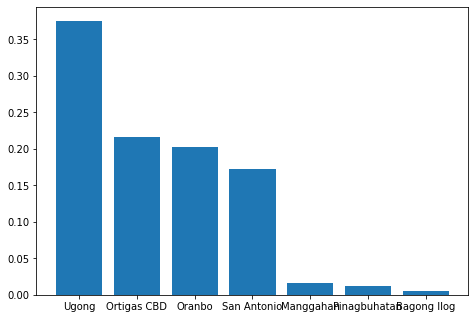

In [27]:
print('Top 5 municipalities with the most real estate offers')
print(pasig.value_counts().nlargest(5))
print('=============================')

index_municipality = list(map(str,np.array(pasig.municipality.value_counts().reset_index()).T[0]))
count_municipality =np.array(pasig.municipality.value_counts().reset_index()).T[1]
norm_municipality = count_municipality/count_municipality.sum()
# Histogram of the Municiplaities
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(index_municipality, norm_municipality)
# ax.set_xticks([])
plt.show()

This maybe be further studied later on whether classifying the municipality has an effect on the data. Checking the correlation of the data. 

In [28]:
temp = adj_pasig.drop(['Price (PHP)'], axis=1)
corr = temp.corr()
print(corr)
temp = corr[((corr > 0.3) & (corr != 1)) | ((corr < -0.3) & (corr != 1))]
print('================================')
print(temp.count())
print('================================')
print('Total number of correlations that fit into the desire correlation conditions: {}'. format(sum(temp.count())))

                  Bedrooms      Bath  Floor_area (sqm)
Bedrooms          1.000000  0.677322          0.408650
Bath              0.677322  1.000000          0.406383
Floor_area (sqm)  0.408650  0.406383          1.000000
Bedrooms            2
Bath                2
Floor_area (sqm)    2
dtype: int64
Total number of correlations that fit into the desire correlation conditions: 6


From this, we can see that all variables chosen are shown to have a positive correlation with one another. This is mainly seen in the Bath and Bedrooms variable.

## Model Fitting

Once again, we will be applying the linear model.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(adj_pasig.iloc[:,1:4],adj_pasig.iloc[:,0], test_size = 0.2 )
mod2 = sm.OLS(y_train, X_train).fit()
print(mod2.summary())

                                 OLS Regression Results                                
Dep. Variable:            Price (PHP)   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              7342.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):                        0.00
Time:                        18:04:05   Log-Likelihood:                         -9238.9
No. Observations:                 557   AIC:                                  1.848e+04
Df Residuals:                     554   BIC:                                  1.850e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Once again, we see that the variables are all significant in predicting the model. Now we move again to residual analysis.

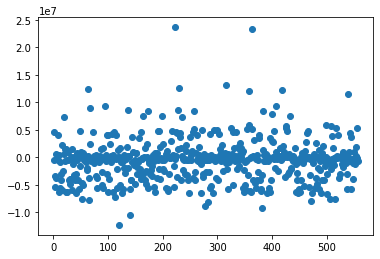

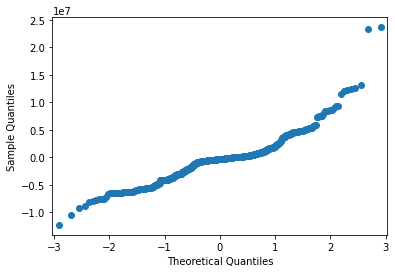

In [30]:
res2 = mod2.resid
plt.scatter(list(range(1,len(res2)+1)),res2)
fig = sm.qqplot(res2)
plt.show()

Once again, there are extremeties that cause the data to fluctuate however, this time the data looks a lot more normal and simialry the data is randomly distributed as seen from the scatter plot excluding the instances of the outliers.

In [31]:
stats.stattools.jarque_bera(res2)

(913.444327959059,
 4.4471770597493445e-199,
 1.2101232983522157,
 8.787993553492026)

The data is shown to not be normally distirbuted, thus, there might be some other factors that are not understood. Thus, we apply a more refined dataset of real estate in the city of Pasig and a specific municipality.

## Predictions

In [32]:
y_pred = mod2.predict(X_test)
print('Variance of the testing data: {}'.format(round(np.var(y_test),4)))
print('Variance of the predicted data: {}'.format(round(np.var(y_pred),4)))
print('=======================================')
F = np.var(y_test)/np.var(y_pred)
df1 = len(y_test) - 1
df2 = len(y_pred) - 1
p_value = scipy.stats.f.cdf(F, df1, df2)
print('F-test\'s p-value: {}'.format(round(p_value,4)))
if p_value < 0.05:
    var = False
else:
    var = True


ts, pval = scipy.stats.ttest_ind(y_pred, y_test, equal_var = var)
if pval < 0.05:
    print('The predicted values are statistically equal to the actual values.')
else:
    print('The predicted values are NOT statistically equal to the actual values.')


Variance of the testing data: 272689459539528.0
Variance of the predicted data: 191373519541536.34
F-test's p-value: 0.9812
The predicted values are NOT statistically equal to the actual values.


# Choosing a Specific municiplaity

## Data Cleaning

In [33]:
#Parameter
mun = 'Ugong'

mun_df = adj_pasig[adj_pasig.municipality == mun]
mun_df = mun_df.drop(['municipality'], axis = 1)
mun_df.head()

,Price (PHP),Bedrooms,Bath,Floor_area (sqm)
3,16011000.0,1.0,0.0,58.0
7,15492000.0,1.0,0.0,56.0
16,16618000.0,1.0,0.0,57.0
17,18160000.0,1.0,0.0,57.0
18,15669000.0,1.0,0.0,58.0


## EDA

In [34]:
temp = mun_df.drop(['Price (PHP)'], axis = 1)
corr = temp.corr()
print(corr)
temp = corr[((corr > 0.3) & (corr != 1)) | ((corr < -0.3) & (corr != 1))]
print('================================')
print(temp.count())
print('================================')
print('Total number of correlations that fit into the desire correlation conditions: {}'. format(sum(temp.count())))

                  Bedrooms      Bath  Floor_area (sqm)
Bedrooms          1.000000  0.366711          0.265653
Bath              0.366711  1.000000          0.273390
Floor_area (sqm)  0.265653  0.273390          1.000000
Bedrooms            1
Bath                1
Floor_area (sqm)    0
dtype: int64
Total number of correlations that fit into the desire correlation conditions: 2


## Model Fitting

In [35]:
X_train, X_test, y_train, y_test = train_test_split(mun_df.iloc[:,1:4],mun_df.iloc[:,0], test_size = 0.2 )
mod3 = sm.OLS(y_train, X_train).fit()
print(mod3.summary())

                                 OLS Regression Results                                
Dep. Variable:            Price (PHP)   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.664e+04
Date:                Fri, 03 Jun 2022   Prob (F-statistic):                   1.87e-245
Time:                        18:04:12   Log-Likelihood:                         -3223.1
No. Observations:                 209   AIC:                                      6452.
Df Residuals:                     206   BIC:                                      6462.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Since the bedrooms variable is not significant we create a new model to see whether a more parsimonious model is more effective

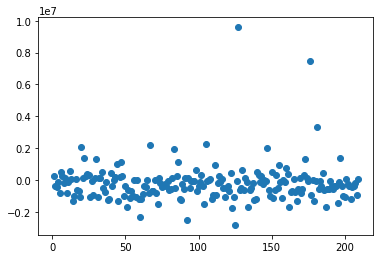

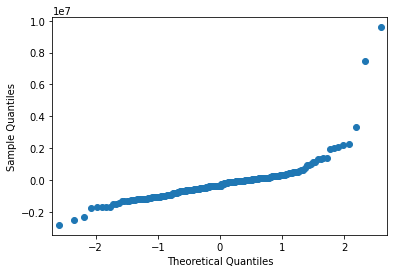

In [36]:
res3 = mod3.resid
plt.scatter(list(range(1,len(res3)+1)),res3)
fig = sm.qqplot(res3)
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(mun_df.iloc[:,2:4],mun_df.iloc[:,0], test_size = 0.2 )
mod4 = sm.OLS(y_train, X_train).fit()
print(mod4.summary())
print(anova_lm(mod4, mod3))

                                 OLS Regression Results                                
Dep. Variable:            Price (PHP)   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                          1.957e+04
Date:                Fri, 03 Jun 2022   Prob (F-statistic):                   1.37e-236
Time:                        18:04:13   Log-Likelihood:                         -3257.8
No. Observations:                 209   AIC:                                      6520.
Df Residuals:                     207   BIC:                                      6526.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

From, this, we see that model 4 is more parsimonious than model 3. Thus, we choose model 3. Now checking the residuals once more.

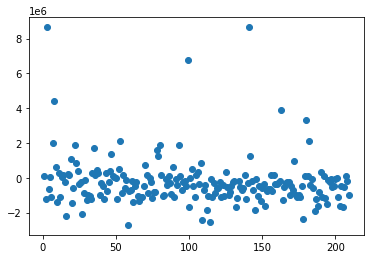

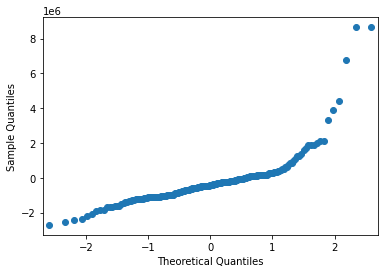

In [38]:
res4 = mod4.resid
plt.scatter(list(range(1,len(res4)+1)),res4)
fig = sm.qqplot(res4)
plt.show()

In [39]:
stats.stattools.jarque_bera(res4)

(2973.6284005655302, 0.0, 3.3818326270222894, 20.196572982670833)

## Predictions

In [40]:
y_pred = mod4.predict(X_test)
print('Variance of the testing data: {}'.format(round(np.var(y_test),4)))
print('Variance of the predicted data: {}'.format(round(np.var(y_pred),4)))
print('=======================================')
F = np.var(y_test)/np.var(y_pred)
df1 = len(y_test) - 1
df2 = len(y_pred) - 1
p_value = scipy.stats.f.cdf(F, df1, df2)
print('F-test\'s p-value: {}'.format(round(p_value,4)))
if p_value < 0.05:
    var = False
else:
    var = True


ts, pval = scipy.stats.ttest_ind(y_pred, y_test, equal_var = var)
if pval < 0.05:
    print('The predicted values are statistically equal to the actual values.')
else:
    print('The predicted values are NOT statistically equal to the actual values.')


Variance of the testing data: 54625943829832.69
Variance of the predicted data: 45348419623820.22
F-test's p-value: 0.7477
The predicted values are NOT statistically equal to the actual values.


Thus, further variables are needed to predict the prices of housing than just the bedroom, bathroom, and the land_area. Other variables may be needed such as the utitlies near the real estate being offerred or the environment of the housing units.